In [1]:
# Importing essential Python libraries

import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
data=pd.read_csv('master.csv')

In [18]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [19]:
# View the columns of the DataFrame
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [27]:
# Number of data or rows in DataFrame
data.shape[0]

27820

In [20]:
# Check missing value in DataFrame
data.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [21]:
# Summary of DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [22]:
data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [23]:
# Dropping "HDI for year" because 19456 values are Null values
data.drop('HDI for year',axis=1,inplace=True)
# Dropping "country-year" to avoid redundancy of data
data.drop('country-year',axis=1,inplace=True)

In [24]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


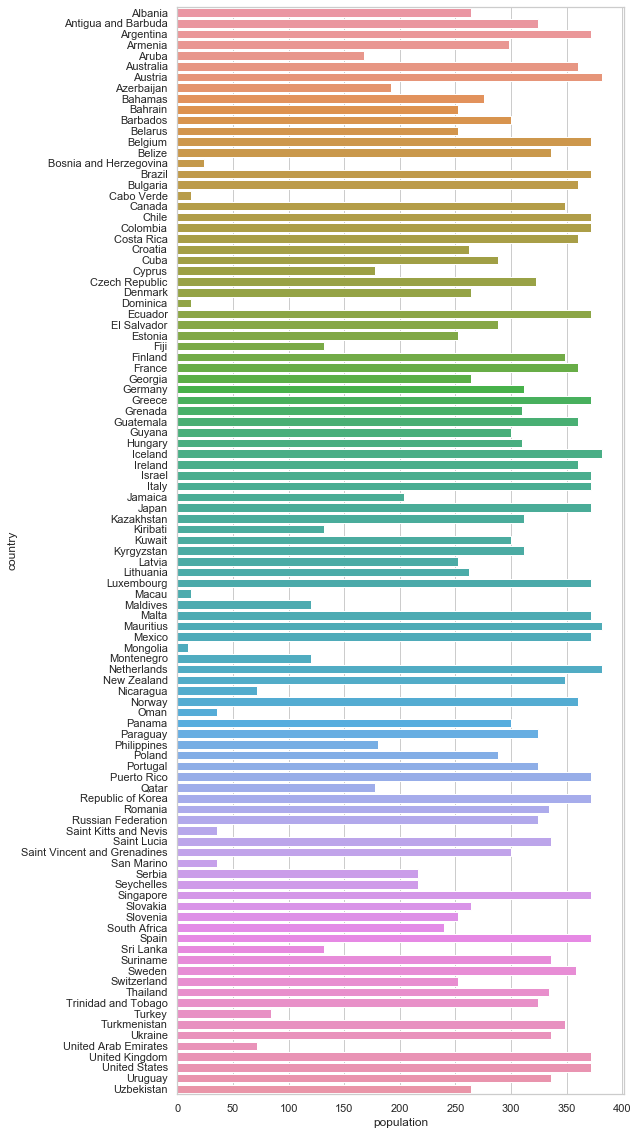

In [49]:
# Population of different countries
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(8, 20))
ax = sns.barplot(data.population.groupby(data.country).count(),data.population.groupby(data.country).count().index)
plt.show()

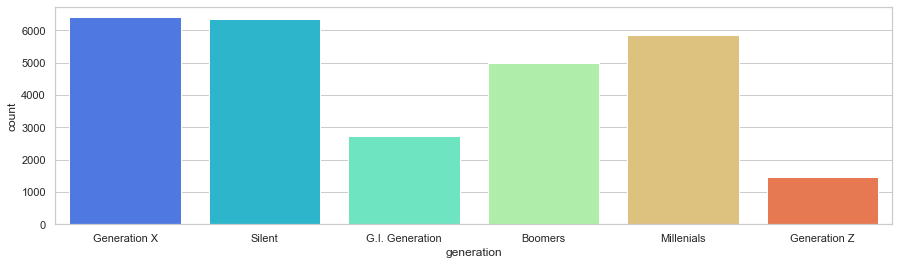

In [26]:
# Frequency of different generations
f,ax = plt.subplots(1,1,figsize=(15,4))
ax = sns.countplot(data.generation,palette='rainbow')
plt.show()

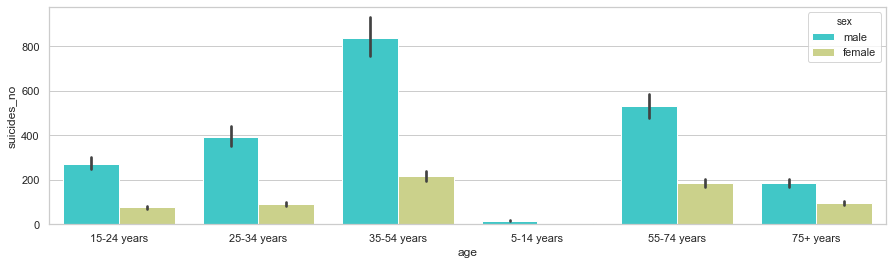

In [31]:
# Number of suicides in different age groups
f,ax = plt.subplots(1,1,figsize=(15,4))
ax = sns.barplot(x = data.age.sort_values(),y = 'suicides_no',hue='sex',data=data,palette='rainbow')
plt.show()

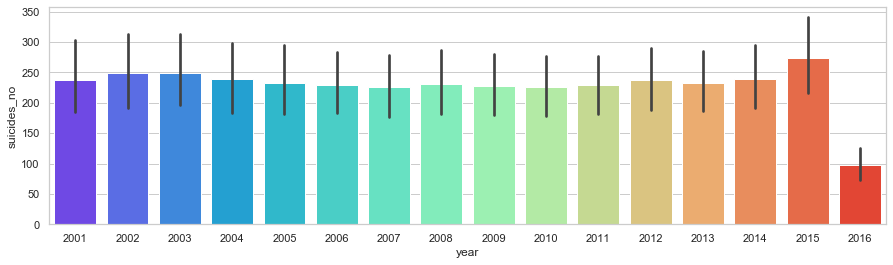

In [37]:
# Suicides each year since 2000
f,ax = plt.subplots(1,1,figsize=(15,4))
ax = sns.barplot(x = data[data.year > 2000]['year'],y = 'suicides_no',data=data,palette='rainbow')
plt.show()

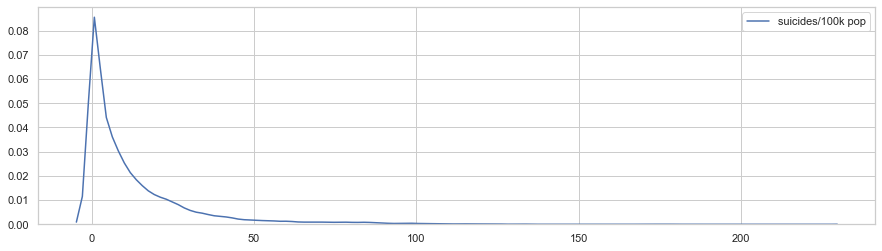

In [39]:
# Distribution of suicides/100k pop
f,ax = plt.subplots(1,1,figsize=(15,4))
ax = sns.kdeplot(data['suicides/100k pop'])
plt.show()

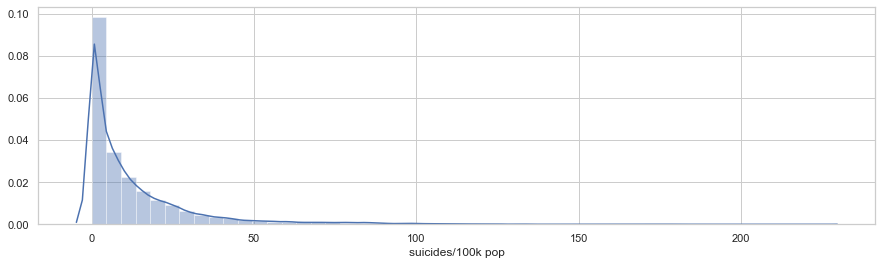

In [50]:
# Distribution of suicides/100k pop
f,ax = plt.subplots(1,1,figsize=(15,4))
ax = sns.distplot(data['suicides/100k pop'])
plt.show()

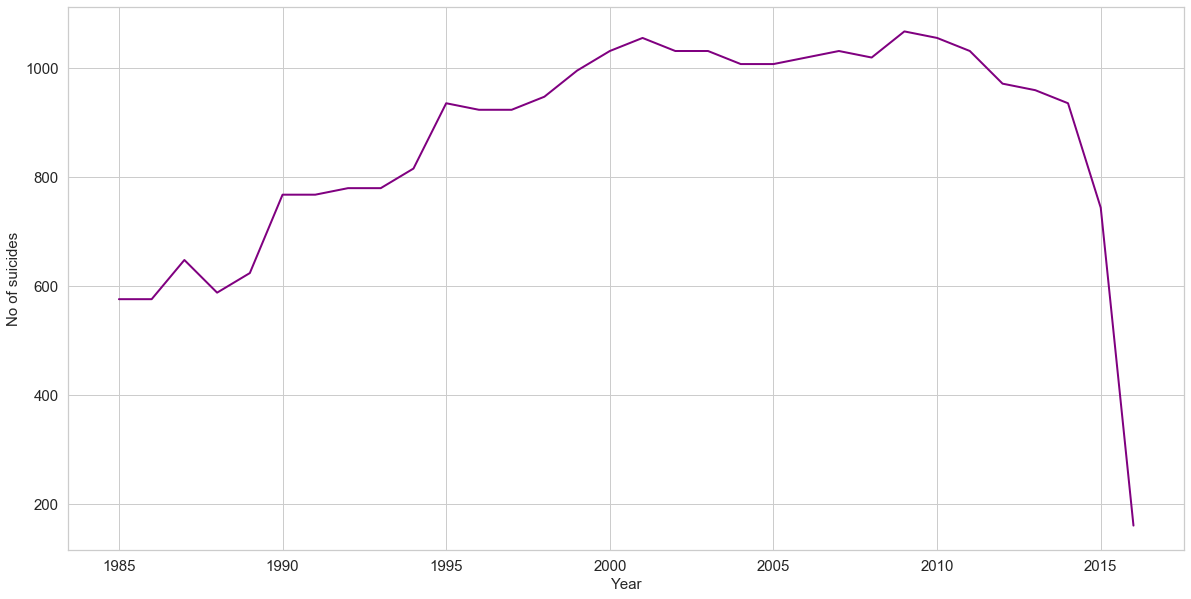

In [40]:
# Change in number of suicides each year
data_time = data['suicides_no'].groupby(data.year).count()
data_time.plot(figsize=(20,10), linewidth=2, fontsize=15,color='purple')
plt.xlabel('Year', fontsize=15)
plt.ylabel('No of suicides',fontsize=15)

plt.show()

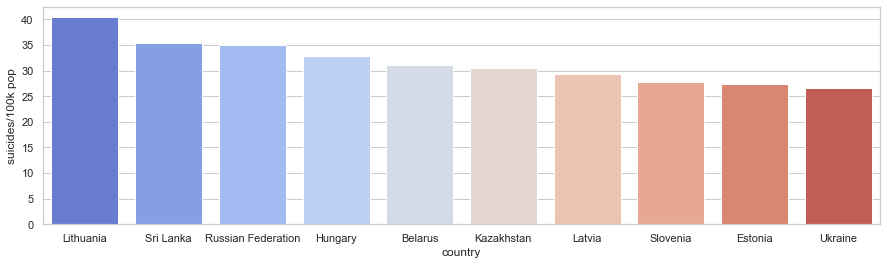

In [41]:
# Top 10 Countries with maximum number of suicides/100k pop
data_suicide_mean = data['suicides/100k pop'].groupby(data.country).mean().sort_values(ascending=False)
f,ax = plt.subplots(1,1,figsize=(15,4))
ax = sns.barplot(data_suicide_mean.head(10).index,data_suicide_mean.head(10),palette='coolwarm')

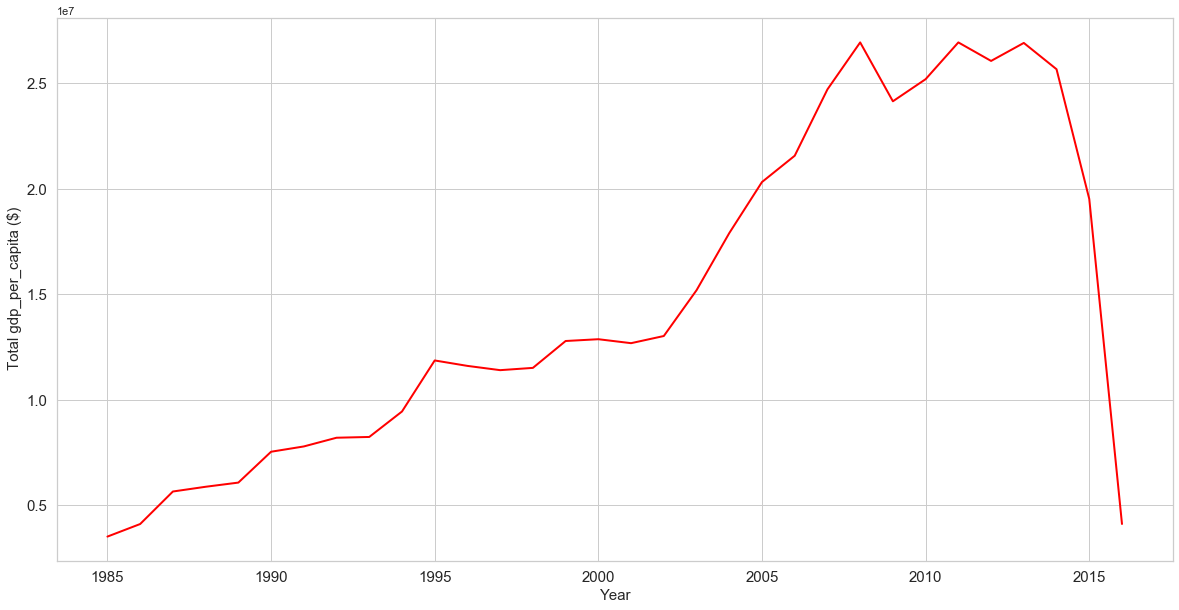

In [43]:
# Change in gdp_per_capita per year
data_gdp = (data['gdp_per_capita ($)'].groupby(data.year)).sum()
data_gdp.plot(figsize=(20,10), linewidth=2, fontsize=15,color='red')
plt.xlabel('Year', fontsize=15)
plt.ylabel(' Total gdp_per_capita ($)',fontsize=15)
plt.show()

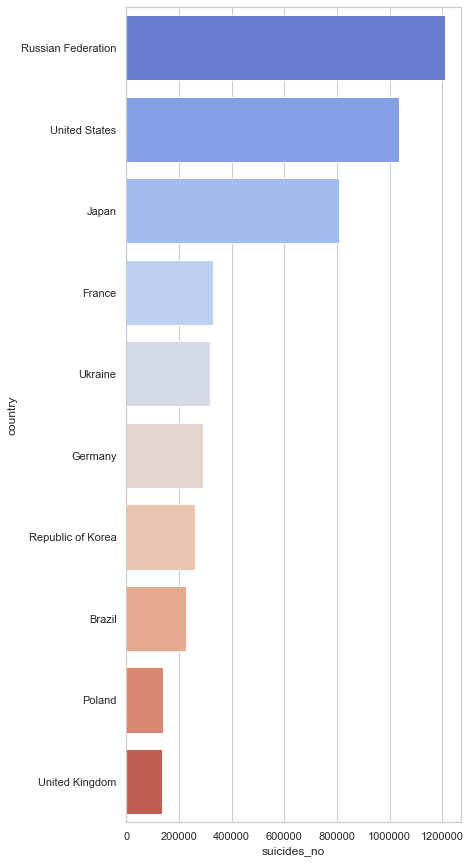

In [44]:
# Top 10 countries with maximum number of suicides since 1985
data_suicide = data['suicides_no'].groupby(data.country).sum().sort_values(ascending=False)
f,ax = plt.subplots(1,1,figsize=(6,15))
ax = sns.barplot(data_suicide.head(10),data_suicide.head(10).index,palette='coolwarm')

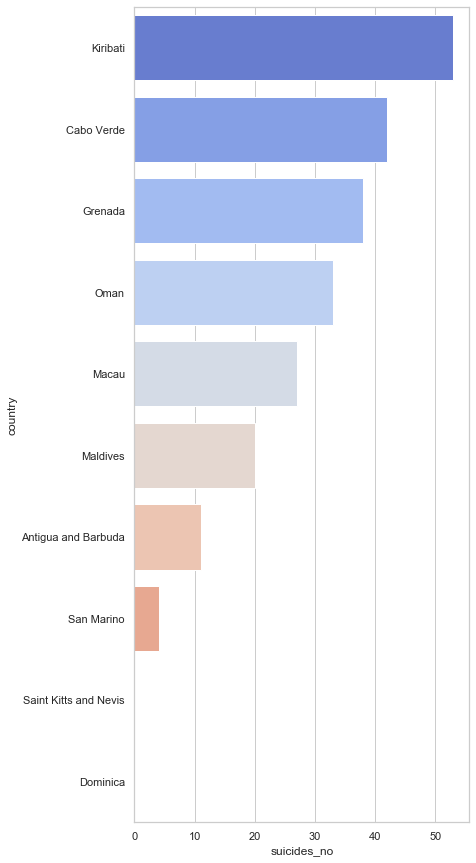

In [45]:
# Top 10 countries with least number of suicides since 1985
data_suicide = data['suicides_no'].groupby(data.country).sum().sort_values(ascending=False)
f,ax = plt.subplots(1,1,figsize=(6,15))

ax = sns.barplot(data_suicide.tail(10),data_suicide.tail(10).index,palette='coolwarm')

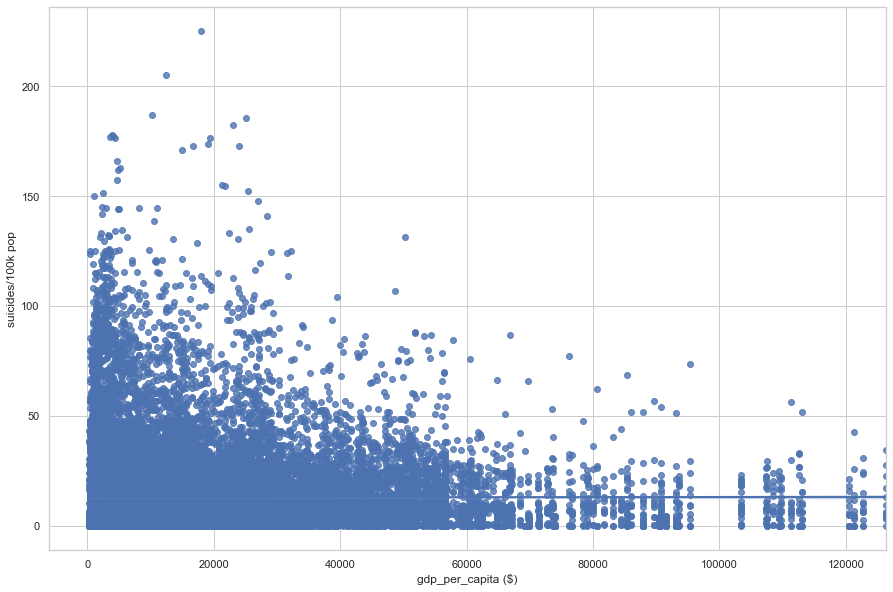

In [46]:
# gdp_per_capita Vs suicides/100k pop
f, ax = plt.subplots(figsize=(15, 10))
ax = sns.regplot(x='gdp_per_capita ($)', y='suicides/100k pop',data=data)
plt.show()

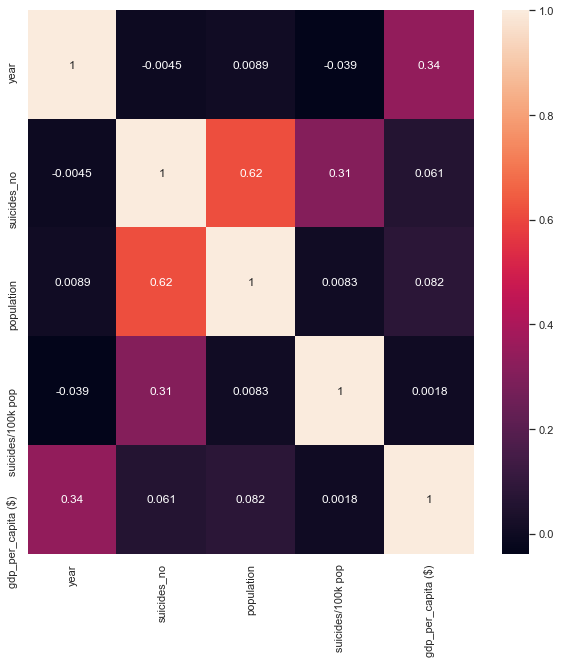

In [47]:
f,ax = plt.subplots(1,1,figsize=(10,10))
ax = sns.heatmap(data.corr(),annot=True)
plt.show()